# Validation of new, open source embedding models: experiment

In our first Snorkel validation, we used the original embedding models from the CIACC paper. Those models are a year old, so in this experiment, we test out new models and compare their similarity scores to those of the old ones. We use the Massive Text Embedding Benchmark (MTEB) leaderboard on [Huggingface](https://huggingface.co/spaces/mteb/leaderboard). Some of the best models there are very large, so we choose models that are around ~4 GB or smaller in size and supported by the `sentence_transformers` library.

### Compute semantic similarity scores

In [3]:
from snorkel.labeling import labeling_function
from snorkel.labeling.model import LabelModel
from snorkel.labeling import PandasLFApplier
import pandas as pd
from sentence_transformers import SentenceTransformer, util

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
df_defi = pd.read_excel("data/research_defs.xlsx")
df = pd.read_csv("data/text-classification-train.csv")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
df_scores = pd.DataFrame()
df_scores['abstract'] = df['ABSTRACT'][:200] # Make the labeled only the first 200

computer_science = 1 # Identified as a CS research article
ABSTAIN = 0 # Not identified as a CS research article

i=0

In [6]:
df_defi['Definition'].iloc[i]

'Computer science is the study of computers and computing, including their theoretical and algorithmic foundations, hardware and software, and their uses for processing information. The discipline of computer science includes the study of algorithms and data structures, computer and network design, modeling data and information processes, and artificial intelligence.'

**Semantic similarity functions**:

In [9]:
# WhereIsAI/UAE-Large-V1
embedder3 = SentenceTransformer("WhereIsAI/UAE-Large-V1")
list_key3 = df_defi['Definition'].iloc[i]
def_embedding3 = embedder3.encode(list_key3, convert_to_tensor=True)

In [19]:
# avsolatorio/GIST-large-Embedding-v0
embedder4 = SentenceTransformer("avsolatorio/GIST-large-Embedding-v0", revision=None)
list_key4 = df_defi['Definition'].iloc[i]
def_embedding4 = embedder4.encode(list_key4, convert_to_tensor=True)

In [23]:
# BAAI/bge-large-zh-v1.5
embedder5 = SentenceTransformer("BAAI/bge-large-zh-v1.5")
list_key5 = df_defi['Definition'].iloc[i]
def_embedding5 = embedder5.encode(list_key5, convert_to_tensor=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arnav\.cache\huggingface\hub\models--BAAI--bge-large-zh-v1.5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/30.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [29]:
# sentence-transformers/all-MiniLM-L6-v2
embedder6 = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
list_key6 = df_defi['Definition'].iloc[i]
def_embedding6 = embedder6.encode(list_key6, convert_to_tensor=True)

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [33]:
embedder1 = SentenceTransformer('Alibaba-NLP/gte-base-en-v1.5', trust_remote_code=True)
list_key1 = df_defi['Definition'].iloc[i]
def_embedding1 = embedder1.encode(list_key1, convert_to_tensor=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\arnav\.cache\huggingface\hub\models--Alibaba-NLP--gte-base-en-v1.5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


README.md:   0%|          | 0.00/71.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/547M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [35]:
def lf_def_1_score(x):
  i = 0
  embedder = SentenceTransformer('Alibaba-NLP/gte-base-en-v1.5', trust_remote_code=True) 
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding1, corpus_embeddings)[0]
  return score    

def lf_def_2_score(x):
  i = 0
  dimensions = 512 
  embedder = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1", truncate_dim=dimensions)
  list_key = df_defi['Definition'].iloc[i]
  def_embedding = embedder.encode(list_key, convert_to_tensor=True)
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding, corpus_embeddings)[0]
  return score

def lf_def_3_score(x):
  i = 0
  dimensions = 512 
  embedder = SentenceTransformer("WhereIsAI/UAE-Large-V1")
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding3, corpus_embeddings)[0]
  return score

def lf_def_4_score(x):
  i = 0
  embedder = SentenceTransformer("avsolatorio/GIST-large-Embedding-v0")
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding4, corpus_embeddings)[0]
  return score

def lf_def_5_score(x):
  i = 0
  embedder = SentenceTransformer("BAAI/bge-large-zh-v1.5")
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding5, corpus_embeddings)[0]
  return score

def lf_def_6_score(x):
  i = 0
  embedder = SentenceTransformer("all-MiniLM-L6-v2")
  corpus_embeddings = embedder.encode(x, convert_to_tensor=True)  
  score = util.pytorch_cos_sim(def_embedding6, corpus_embeddings)[0]
  return score

**Generate scores:**

In [14]:
df_scores['LF_2_CS'] = df_scores['abstract'].apply(lf_def_2_score)

C:\Users\arnav\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [12]:
df_scores['LF_3_CS'] = df_scores['abstract'].apply(lf_def_3_score)

In [21]:
df_scores['LF_4_CS'] = df_scores['abstract'].apply(lf_def_4_score)

In [22]:
df_scores

,abstract,LF_3_CS,LF_2_CS,LF_4_CS
0,Predictive models allow subject-specific inf...,[tensor(0.4396)],[tensor(0.4230)],[tensor(0.3488)]
1,Rotation invariance and translation invarian...,[tensor(0.4482)],[tensor(0.4489)],[tensor(0.3502)]
2,We introduce and develop the notion of spher...,[tensor(0.3686)],[tensor(0.3392)],[tensor(0.2219)]
3,The stochastic Landau--Lifshitz--Gilbert (LL...,[tensor(0.3901)],[tensor(0.3590)],[tensor(0.2995)]
4,Fourier-transform infra-red (FTIR) spectra o...,[tensor(0.4245)],[tensor(0.3912)],[tensor(0.3046)]
...,...,...,...,...
195,We relate the concepts used in decentralized...,[tensor(0.5146)],[tensor(0.4770)],[tensor(0.4258)]
196,Time-varying network topologies can deeply i...,[tensor(0.4321)],[tensor(0.4197)],[tensor(0.3440)]
197,A long-standing obstacle to progress in deep...,[tensor(0.4407)],[tensor(0.4103)],[tensor(0.3273)]
198,We study the band structure topology and eng...,[tensor(0.3777)],[tensor(0.3449)],[tensor(0.2795)]


In [25]:
df_scores.to_csv("most_new_embeddings.csv")

In [26]:
df_scores['LF_5_CS'] = df_scores['abstract'].apply(lf_def_5_score)

In [31]:
df_scores['LF_6_CS'] = df_scores['abstract'].apply(lf_def_6_score)

In [32]:
df_scores

,abstract,LF_3_CS,LF_2_CS,LF_4_CS,LF_5_CS,LF_6_CS
0,Predictive models allow subject-specific inf...,[tensor(0.4396)],[tensor(0.4230)],[tensor(0.3488)],[tensor(0.3924)],[tensor(0.1078)]
1,Rotation invariance and translation invarian...,[tensor(0.4482)],[tensor(0.4489)],[tensor(0.3502)],[tensor(0.3646)],[tensor(-0.0260)]
2,We introduce and develop the notion of spher...,[tensor(0.3686)],[tensor(0.3392)],[tensor(0.2219)],[tensor(0.4131)],[tensor(0.0480)]
3,The stochastic Landau--Lifshitz--Gilbert (LL...,[tensor(0.3901)],[tensor(0.3590)],[tensor(0.2995)],[tensor(0.3871)],[tensor(0.0580)]
4,Fourier-transform infra-red (FTIR) spectra o...,[tensor(0.4245)],[tensor(0.3912)],[tensor(0.3046)],[tensor(0.4110)],[tensor(0.0644)]
...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,[tensor(0.5146)],[tensor(0.4770)],[tensor(0.4258)],[tensor(0.5947)],[tensor(0.1649)]
196,Time-varying network topologies can deeply i...,[tensor(0.4321)],[tensor(0.4197)],[tensor(0.3440)],[tensor(0.4186)],[tensor(0.0662)]
197,A long-standing obstacle to progress in deep...,[tensor(0.4407)],[tensor(0.4103)],[tensor(0.3273)],[tensor(0.4446)],[tensor(-0.0580)]
198,We study the band structure topology and eng...,[tensor(0.3777)],[tensor(0.3449)],[tensor(0.2795)],[tensor(0.3667)],[tensor(-0.0331)]


In [36]:
df_scores['LF_1_CS'] = df_scores['abstract'].apply(lf_def_1_score)

In [37]:
df_scores

,abstract,LF_3_CS,LF_2_CS,LF_4_CS,LF_5_CS,LF_6_CS,LF_1_CS
0,Predictive models allow subject-specific inf...,[tensor(0.4396)],[tensor(0.4230)],[tensor(0.3488)],[tensor(0.3924)],[tensor(0.1078)],[tensor(0.2488)]
1,Rotation invariance and translation invarian...,[tensor(0.4482)],[tensor(0.4489)],[tensor(0.3502)],[tensor(0.3646)],[tensor(-0.0260)],[tensor(0.1526)]
2,We introduce and develop the notion of spher...,[tensor(0.3686)],[tensor(0.3392)],[tensor(0.2219)],[tensor(0.4131)],[tensor(0.0480)],[tensor(0.0845)]
3,The stochastic Landau--Lifshitz--Gilbert (LL...,[tensor(0.3901)],[tensor(0.3590)],[tensor(0.2995)],[tensor(0.3871)],[tensor(0.0580)],[tensor(0.0867)]
4,Fourier-transform infra-red (FTIR) spectra o...,[tensor(0.4245)],[tensor(0.3912)],[tensor(0.3046)],[tensor(0.4110)],[tensor(0.0644)],[tensor(0.2577)]
...,...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,[tensor(0.5146)],[tensor(0.4770)],[tensor(0.4258)],[tensor(0.5947)],[tensor(0.1649)],[tensor(0.3979)]
196,Time-varying network topologies can deeply i...,[tensor(0.4321)],[tensor(0.4197)],[tensor(0.3440)],[tensor(0.4186)],[tensor(0.0662)],[tensor(0.1868)]
197,A long-standing obstacle to progress in deep...,[tensor(0.4407)],[tensor(0.4103)],[tensor(0.3273)],[tensor(0.4446)],[tensor(-0.0580)],[tensor(0.2167)]
198,We study the band structure topology and eng...,[tensor(0.3777)],[tensor(0.3449)],[tensor(0.2795)],[tensor(0.3667)],[tensor(-0.0331)],[tensor(0.0794)]


In [38]:
df_scores.to_csv("final_embeddings.csv")

In [39]:
df_scores

,abstract,LF_3_CS,LF_2_CS,LF_4_CS,LF_5_CS,LF_6_CS,LF_1_CS
0,Predictive models allow subject-specific inf...,[tensor(0.4396)],[tensor(0.4230)],[tensor(0.3488)],[tensor(0.3924)],[tensor(0.1078)],[tensor(0.2488)]
1,Rotation invariance and translation invarian...,[tensor(0.4482)],[tensor(0.4489)],[tensor(0.3502)],[tensor(0.3646)],[tensor(-0.0260)],[tensor(0.1526)]
2,We introduce and develop the notion of spher...,[tensor(0.3686)],[tensor(0.3392)],[tensor(0.2219)],[tensor(0.4131)],[tensor(0.0480)],[tensor(0.0845)]
3,The stochastic Landau--Lifshitz--Gilbert (LL...,[tensor(0.3901)],[tensor(0.3590)],[tensor(0.2995)],[tensor(0.3871)],[tensor(0.0580)],[tensor(0.0867)]
4,Fourier-transform infra-red (FTIR) spectra o...,[tensor(0.4245)],[tensor(0.3912)],[tensor(0.3046)],[tensor(0.4110)],[tensor(0.0644)],[tensor(0.2577)]
...,...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,[tensor(0.5146)],[tensor(0.4770)],[tensor(0.4258)],[tensor(0.5947)],[tensor(0.1649)],[tensor(0.3979)]
196,Time-varying network topologies can deeply i...,[tensor(0.4321)],[tensor(0.4197)],[tensor(0.3440)],[tensor(0.4186)],[tensor(0.0662)],[tensor(0.1868)]
197,A long-standing obstacle to progress in deep...,[tensor(0.4407)],[tensor(0.4103)],[tensor(0.3273)],[tensor(0.4446)],[tensor(-0.0580)],[tensor(0.2167)]
198,We study the band structure topology and eng...,[tensor(0.3777)],[tensor(0.3449)],[tensor(0.2795)],[tensor(0.3667)],[tensor(-0.0331)],[tensor(0.0794)]


In [43]:
# Define a function to clean and convert the string
def extract_number(tensor_obj):
    return tensor_obj.item()

In [54]:
df_scores.to_csv("data/new_embeddings_scores.csv")

### Compute Snorkel Labels

In [82]:
df_scores = pd.read_csv("data/new_embeddings_scores.csv")
df_scores

,abstract,LF_3_CS,LF_2_CS,LF_4_CS,LF_5_CS,LF_6_CS,LF_1_CS
0,Predictive models allow subject-specific inf...,0.439639,0.423025,0.348754,0.392376,0.107838,0.248826
1,Rotation invariance and translation invarian...,0.448152,0.448879,0.350227,0.364609,-0.026016,0.152645
2,We introduce and develop the notion of spher...,0.368582,0.339250,0.221878,0.413114,0.048041,0.084481
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0.390118,0.358973,0.299488,0.387104,0.058003,0.086686
4,Fourier-transform infra-red (FTIR) spectra o...,0.424481,0.391190,0.304644,0.411026,0.064444,0.257730
...,...,...,...,...,...,...,...
195,We relate the concepts used in decentralized...,0.514598,0.477033,0.425821,0.594741,0.164870,0.397921
196,Time-varying network topologies can deeply i...,0.432069,0.419655,0.344007,0.418562,0.066205,0.186844
197,A long-standing obstacle to progress in deep...,0.440671,0.410278,0.327314,0.444599,-0.057988,0.216710
198,We study the band structure topology and eng...,0.377650,0.344910,0.279472,0.366671,-0.033070,0.079397


We observe that both `LF_1_CS` and `LF_6_CS` seem to perform worse. `LF_6_CS` represents `all-MiniLM-L6-v2`, which is not on any leaderboard and was included because of its popularity. Since both of these embedding models perform the worst relative to the others, we remove them from Snorkel.

In [97]:
df_labeled = pd.DataFrame()
df_labeled['abstract'] = df_scores['abstract']

In [84]:
@labeling_function()
def lf_def_2(x):
  score = df_scores[df_scores['abstract'] == x['abstract']]['LF_2_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

@labeling_function()
def lf_def_3(x):
  score = df_scores[df_scores['abstract'] == x['abstract']]['LF_3_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

@labeling_function()
def lf_def_4(x):
  score = df_scores[df_scores['abstract'] == x['abstract']]['LF_4_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN

@labeling_function()
def lf_def_5(x):
  score = df_scores[df_scores['abstract'] == x['abstract']]['LF_5_CS'].values[0]
  if score > 0.5:
   return computer_science  
  return ABSTAIN


In [85]:
lfs = [lf_def_2, lf_def_3, lf_def_4, lf_def_5 ]

In [86]:
# Apply the LFs to the unlabeled training data
applier = PandasLFApplier(lfs)
L_train = applier.apply(df_labeled)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 675.10it/s]


In [87]:
# Initialize the LabelModel
label_model = LabelModel(cardinality=2, verbose=True)

# Train the LabelModel
label_model.fit(L_train, n_epochs=500, log_freq=100, seed=123)

INFO:root:Computing O...
INFO:root:Estimating \mu...
100%|████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 860.95epoch/s]
INFO:root:Finished Training


In [88]:
# Get the predicted labels (y_train) for the data points
y_train = label_model.predict(L=L_train)
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [98]:
df_labeled['Snorkel_pred1'] = y_train

### Validating Snorkel

We need to bring in the actual computer science results:

In [92]:
df = pd.read_csv("data/text-classification-train.csv")
df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [94]:
df_scores['CS_actual'] = df_labeled['Computer Science'][:200]

In [99]:
df_scores['Snorkel_pred1'] = df_labeled['Snorkel_pred1']

In [102]:
df = df_scores

**Accuracy of Snorkel model**:

In [103]:
# Number of actual CS documents
len(df[df['CS_actual'] == 1])

78

<Axes: >

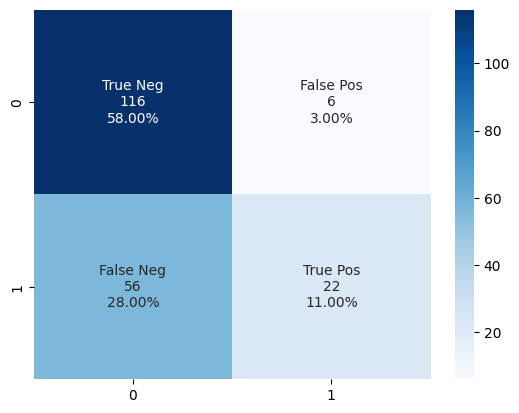

In [104]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df['CS_actual'], df['Snorkel_pred1'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

Interestingly, the combination of these new embedding models has the opposite issue as the previous LLM validation experiment. Instead of a high incidence of false positives, there is a high incidence of false negatives, indicating a type 2 error. The model labels many articles as non-CS articles even when they are CS articles.

Let's take a look at four key metrics for classification models: recall, precision, accuracy, and F1-score

In [105]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.69

In [106]:
# Precision: positive predictive value; of those predicted as CS documents, how many were actually CS documents?
precision = (tp)/(tp+fp)
precision

0.7857142857142857

In [107]:
# Recall: of those that were actually CS documents, how many were predicted as CS documents?
recall = (tp)/(tp+fn)
recall

0.28205128205128205

In [108]:
# F1 score: tries to balance precision and recall, with uneven class distribution (large number of actual negs)
f1 = 2*((precision*recall)/(precision+recall))
f1

0.4150943396226415

Compared to the LLM, our semantic similarity model has about the same level of accuracy, much higher precision (which makes sense, given the low incidence of false positives), much lower recall, and a lower f1-score. This low f1-score should be taken seriously, given that we have a somewhat uneven class distribution (40% CS, 60% non-CS). This is clearly a better model than the previous Snorkel tests.

We can be pretty confident that any article deemed by the Snorkel model as a CS article is probably a CS article. But, unfortunately, it is missing out on many actual CS articles, hence why the recall is quite low. 

In [109]:
df.to_csv("snorkel_new_embedding_final2.csv")

### Evaluating semantic similarity scores

**Distribution of scores:**

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df_scores = pd.DataFrame()
df_scores = df[['LF_1_CS', 'LF_2_CS', 'LF_3_CS', 'LF_4_CS','LF_5_CS','LF_6_CS']]
df_melted = df_scores.melt(var_name='Column', value_name='Value')
df_melted

,Column,Value
0,LF_1_CS,0.248826
1,LF_1_CS,0.152645
2,LF_1_CS,0.084481
3,LF_1_CS,0.086686
4,LF_1_CS,0.257730
...,...,...
1195,LF_6_CS,0.164870
1196,LF_6_CS,0.066205
1197,LF_6_CS,-0.057988
1198,LF_6_CS,-0.033070


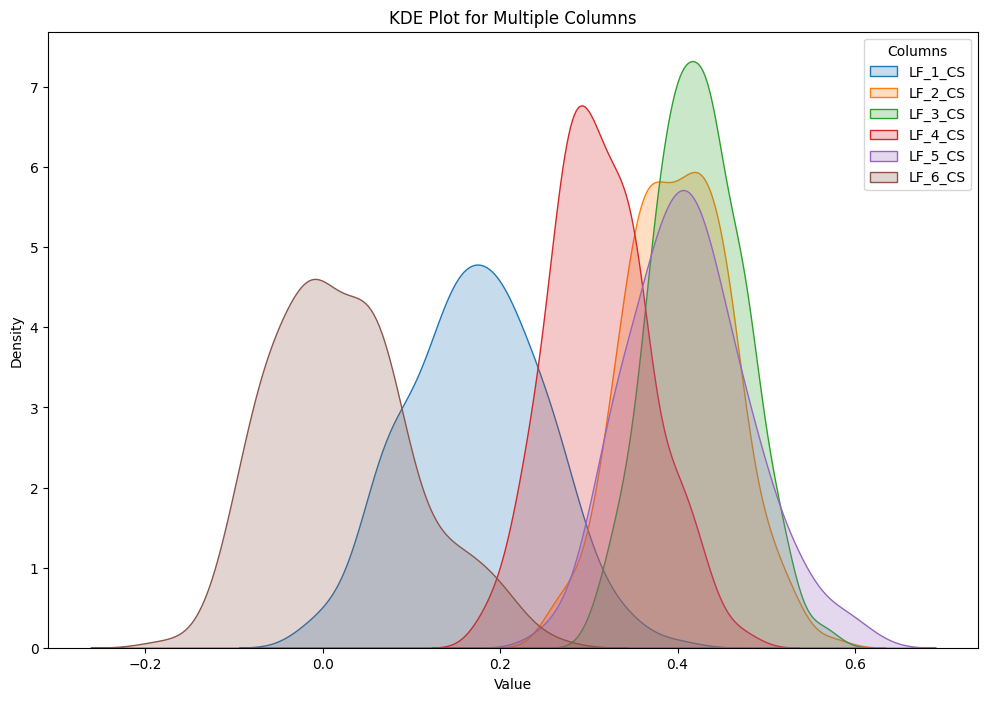

In [112]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot KDE for each column
for column in df_scores.columns:
    sns.kdeplot(df_scores[column], label=column, fill=True)

# Add titles and labels
plt.title('KDE Plot for Multiple Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Columns')
plt.show()

Once again, we see that `LF_1_CS` and `LF_6_CS` are clearly the worst performers, since they fail to produce high enough semantic similarity scores to overcome the threshold.

**How good are the individual embedding models?**

Model: `mixedbread-ai/mxbai-embed-large-v1`, rank: 18

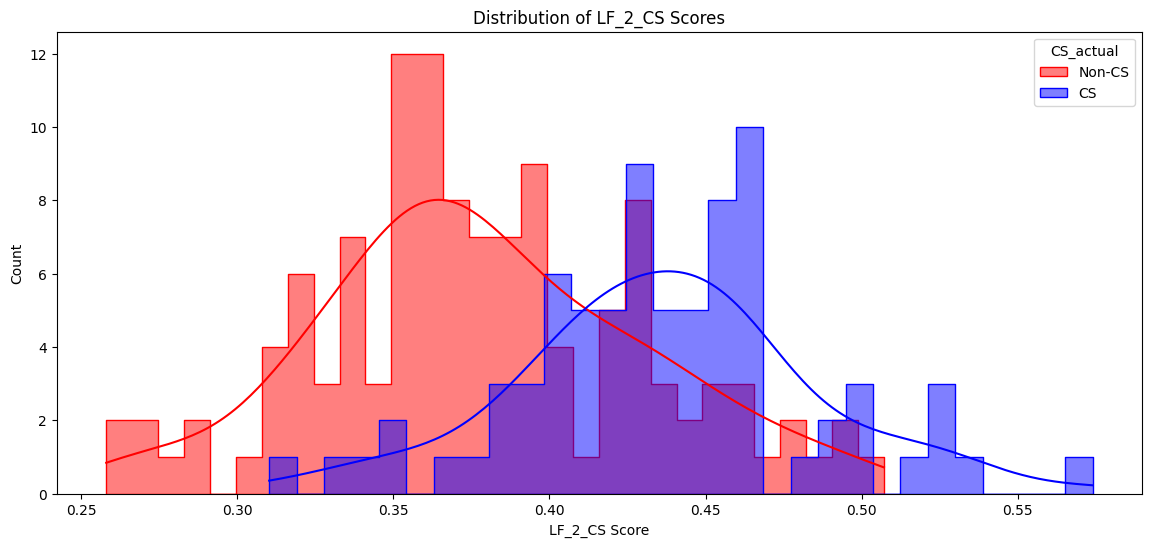

In [115]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df[df['CS_actual'] == 0], x='LF_2_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df[df['CS_actual'] == 1], x='LF_2_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_2_CS Scores')
plt.xlabel('LF_2_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

Model: `WhereIsAI/UAE-Large-V1`, rank: 19

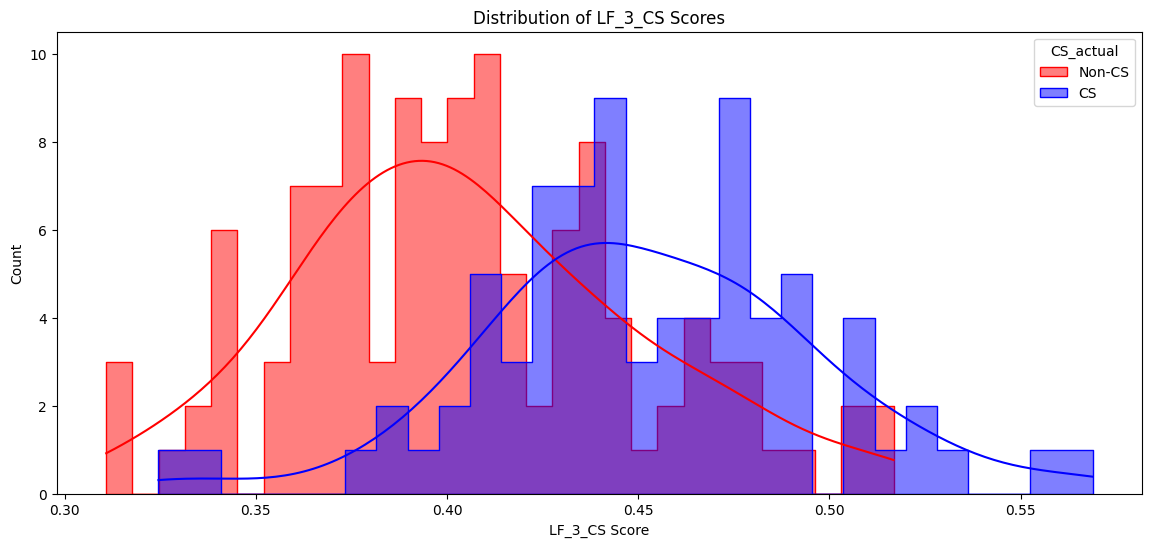

In [116]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df[df['CS_actual'] == 0], x='LF_3_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df[df['CS_actual'] == 1], x='LF_3_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_3_CS Scores')
plt.xlabel('LF_3_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

Model: `avsolatorio/GIST-large-Embedding-v0`, rank: 25

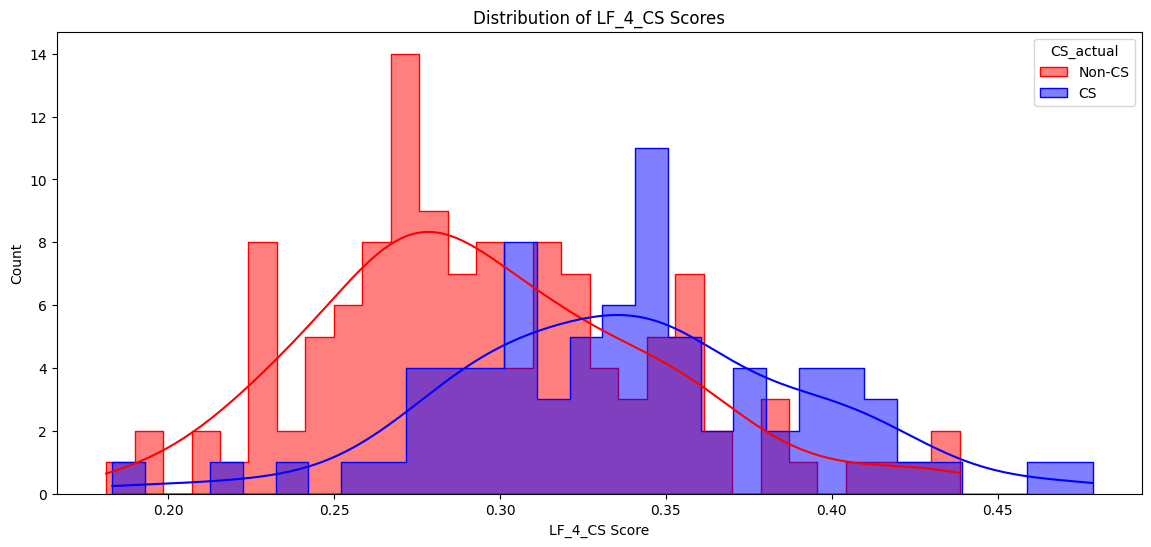

In [117]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df[df['CS_actual'] == 0], x='LF_4_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df[df['CS_actual'] == 1], x='LF_4_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_4_CS Scores')
plt.xlabel('LF_4_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

Model: `BAAI/bge-large-zh-v1.5`, rank: 26

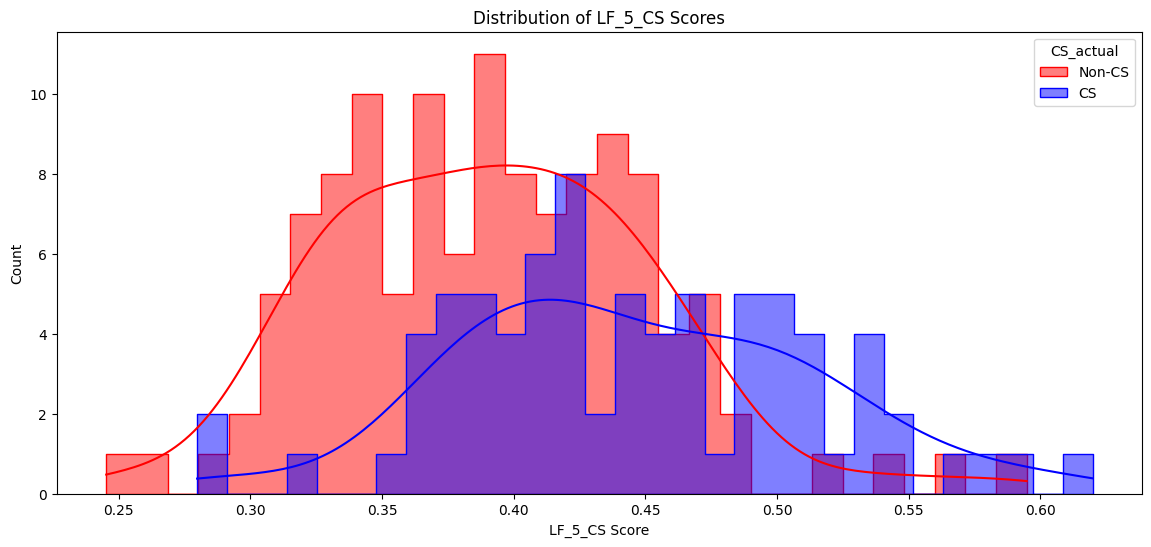

In [118]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df[df['CS_actual'] == 0], x='LF_5_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df[df['CS_actual'] == 1], x='LF_5_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_5_CS Scores')
plt.xlabel('LF_5_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

Model: `Alibaba-NLP/gte-base-en-v1.5`, rank: 30

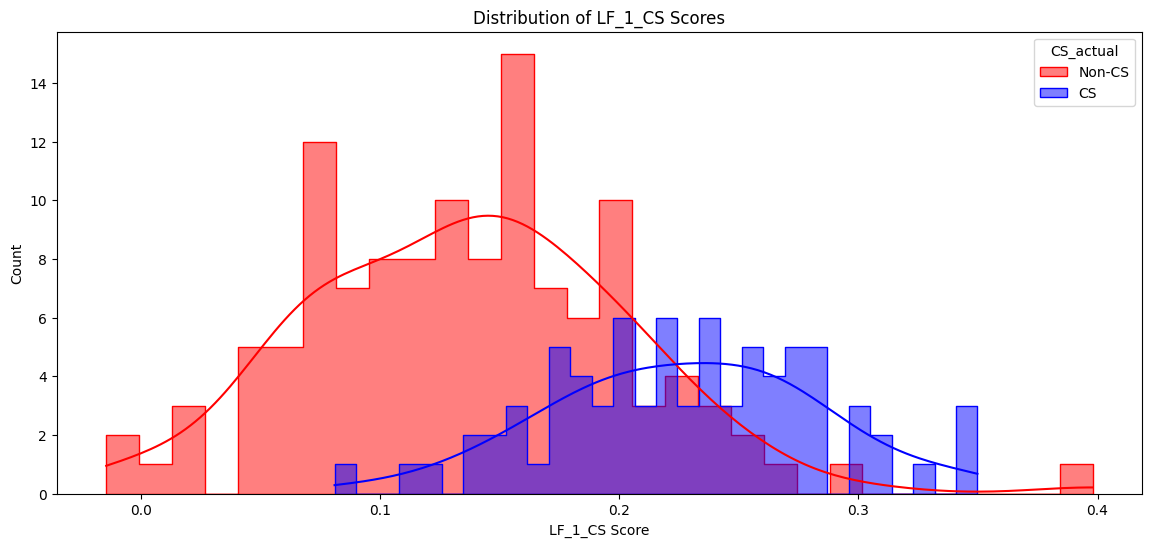

In [113]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df[df['CS_actual'] == 0], x='LF_1_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df[df['CS_actual'] == 1], x='LF_1_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_1_CS Scores')
plt.xlabel('LF_1_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

Model: `sentence-transformers/all-MiniLM-L6-v2`, rank: 114

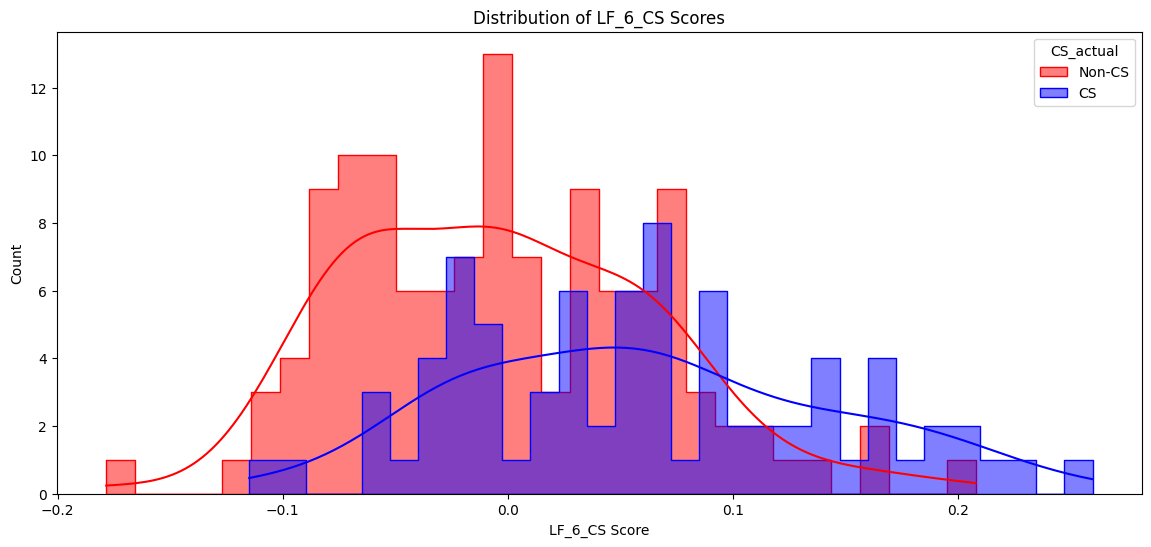

In [119]:
plt.figure(figsize=(14, 6))

# Histogram for Non-CS (CS_actual = 0)
sns.histplot(df[df['CS_actual'] == 0], x='LF_6_CS', color='red', 
             kde=True, bins=30, label='Non-CS', element='step', alpha=0.5)
# Histogram for CS (CS_actual = 1)
sns.histplot(df[df['CS_actual'] == 1], x='LF_6_CS', color='blue', 
             kde=True, bins=30, label='CS', element='step', alpha=0.5)
plt.title('Distribution of LF_6_CS Scores')
plt.xlabel('LF_6_CS Score')
plt.ylabel('Count')
plt.legend(title='CS_actual', loc='upper right')
plt.show()

**Conclusions**

The newer models clearly perform better, but the sum total of them are still incapable at classifying many CS articles. Looking at the graphs, we see that a reduction in threshold would probably not be the right move; any attempt to do so would let in many non-CS articles too, drastically reducing accuracy. From here, a couple of next steps seem to emerge:

1. It is plausible that a higher-ranking model would do this job better. However, these models are much, much larger than the ones I used (~1 GB vs. 26 GB). The results here suggest that higher-ranking models tend to perform better than lower-ranking ones. If this is true, and size is not an issue, we should use larger, higher-ranked models.

2. If we can choose a better definition, we might be able to get less overlap and higher scores.